In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from statsmodels.formula.api import ols

读取并查看数据的基本信息

In [2]:
df1 = pd.read_csv('./vgsales.csv')
print(df1.info())
df1.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


通过表格数据可以看到，只有年份和发行商这两列数据有缺失且缺失的不多，考虑将缺失行直接剔除来进行缺失数据处理

In [3]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


查看标称属性的信息

In [4]:
df1.describe(include='object').T 

,count,unique,top,freq
Name,16291,11325,Need for Speed: Most Wanted,12
Platform,16291,31,DS,2131
Genre,16291,12,Action,3251
Publisher,16291,576,Electronic Arts,1339


查看数值属性的信息

In [5]:
df1.describe(include='float64').T 

,count,mean,std,min,25%,50%,75%,max
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


查看总销量排名前十的游戏，通过总销量查看哪些游戏受欢迎

In [6]:
df2=df1[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
topGolobalsales = df2.groupby('Name').sum().sort_values('Global_Sales',ascending = False).head(10)
print(topGolobalsales)

                                NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Name                                                                        
Wii Sports                         41.49     29.02      3.77         8.46   
Grand Theft Auto V                 23.46     23.04      1.39         8.03   
Super Mario Bros.                  32.48      4.88      6.96         0.99   
Tetris                             26.17      2.95      6.03         0.69   
Mario Kart Wii                     15.85     12.88      3.79         3.31   
Wii Sports Resort                  15.75     11.01      3.28         2.96   
Pokemon Red/Pokemon Blue           11.27      8.89     10.22         1.00   
Call of Duty: Modern Warfare 3     15.58     11.29      0.62         3.35   
New Super Mario Bros.              11.38      9.23      6.50         2.90   
Call of Duty: Black Ops II         14.08     11.05      0.72         3.88   

                                Global_Sales  
Name                        

将这些受欢迎的游戏的销量可视化

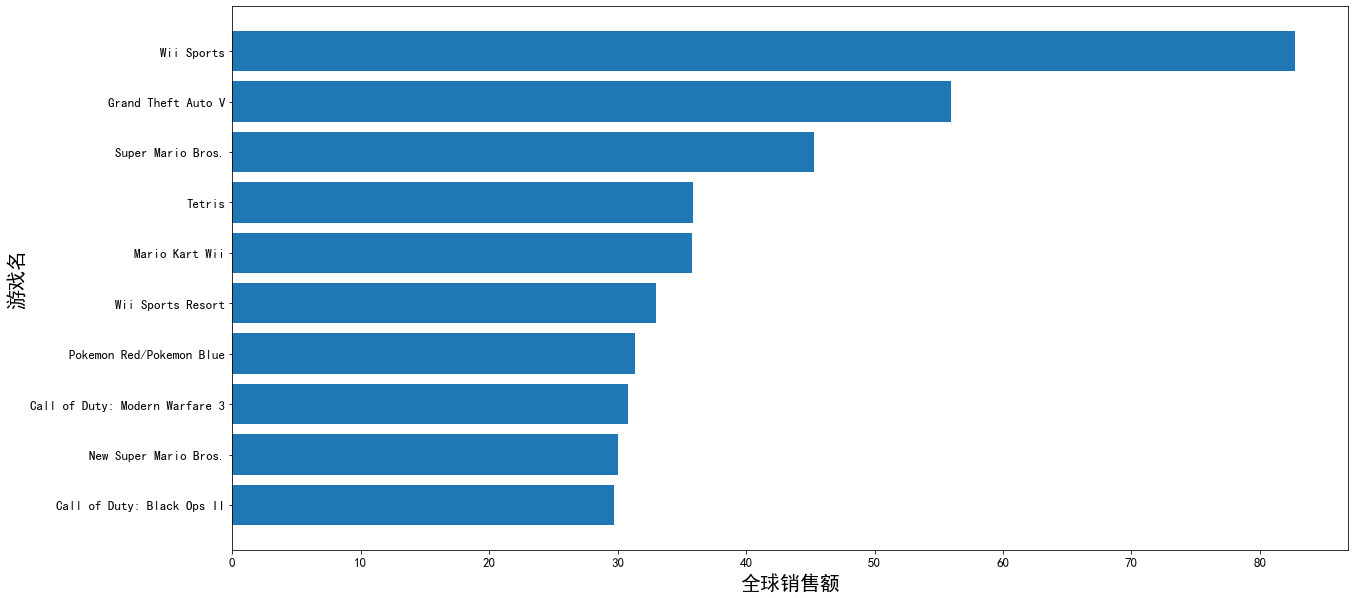

In [7]:
y=topGolobalsales['Global_Sales'].values[::-1]
x=topGolobalsales.index.values[::-1]
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("全球销售额",fontdict={'weight':'normal','size':20})
plt.ylabel("游戏名",fontdict={'weight':'normal','size':20})
plt.tick_params(labelsize = 13)
plt.barh(x,y)
plt.show()

查看总销量排名前十的平台，通过总销量查看哪些平台受欢迎

In [8]:
df3=df1[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
topPlatform = df3.groupby('Platform').sum().sort_values('Global_Sales',ascending = False).head(10)
print(topGolobalsales)

                                NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Name                                                                        
Wii Sports                         41.49     29.02      3.77         8.46   
Grand Theft Auto V                 23.46     23.04      1.39         8.03   
Super Mario Bros.                  32.48      4.88      6.96         0.99   
Tetris                             26.17      2.95      6.03         0.69   
Mario Kart Wii                     15.85     12.88      3.79         3.31   
Wii Sports Resort                  15.75     11.01      3.28         2.96   
Pokemon Red/Pokemon Blue           11.27      8.89     10.22         1.00   
Call of Duty: Modern Warfare 3     15.58     11.29      0.62         3.35   
New Super Mario Bros.              11.38      9.23      6.50         2.90   
Call of Duty: Black Ops II         14.08     11.05      0.72         3.88   

                                Global_Sales  
Name                        

将这些平台的游戏销量可视化

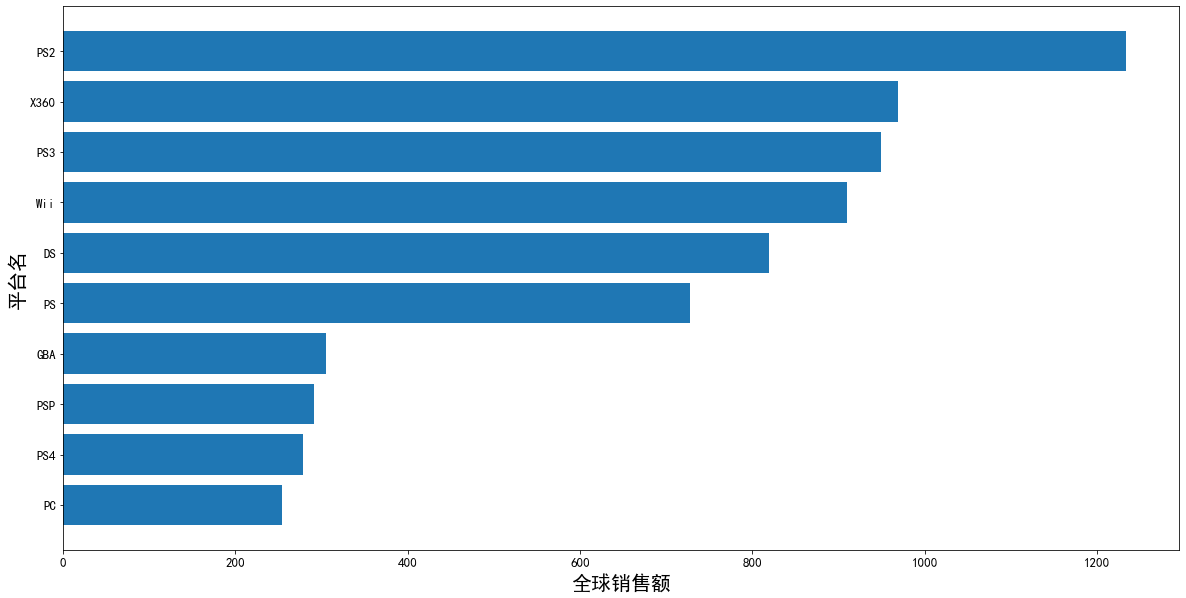

In [9]:
y=topPlatform['Global_Sales'].values[::-1]
x=topPlatform.index.values[::-1]
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("全球销售额",fontdict={'weight':'normal','size':20})
plt.ylabel("平台名",fontdict={'weight':'normal','size':20})
plt.tick_params(labelsize = 13)
plt.barh(x,y)
plt.show()

查看总销量排名前十的游戏类型，通过总销量查看哪些类型的游戏受欢迎

In [10]:
df4=df1[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
topGenre = df4.groupby('Genre').sum().sort_values('Global_Sales',ascending = False).head(10)
print(topGenre)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          861.77    516.48    158.65       184.92       1722.84
Sports          670.09    371.34    134.76       132.65       1309.24
Shooter         575.16    310.45     38.18       101.90       1026.20
Role-Playing    326.50    187.57    350.29        59.38        923.83
Platform        445.99    200.65    130.65        51.51        829.13
Misc            396.92    211.77    106.67        73.92        789.87
Racing          356.93    236.31     56.61        76.68        726.76
Fighting        220.74    100.00     87.15        36.19        444.05
Simulation      181.78    113.02     63.54        31.36        389.98
Puzzle          122.01     50.52     56.68        12.47        242.21


从表中可以看到，动作、运动、射击类的游戏比较受欢迎，现在将这些游戏类型销量可视化

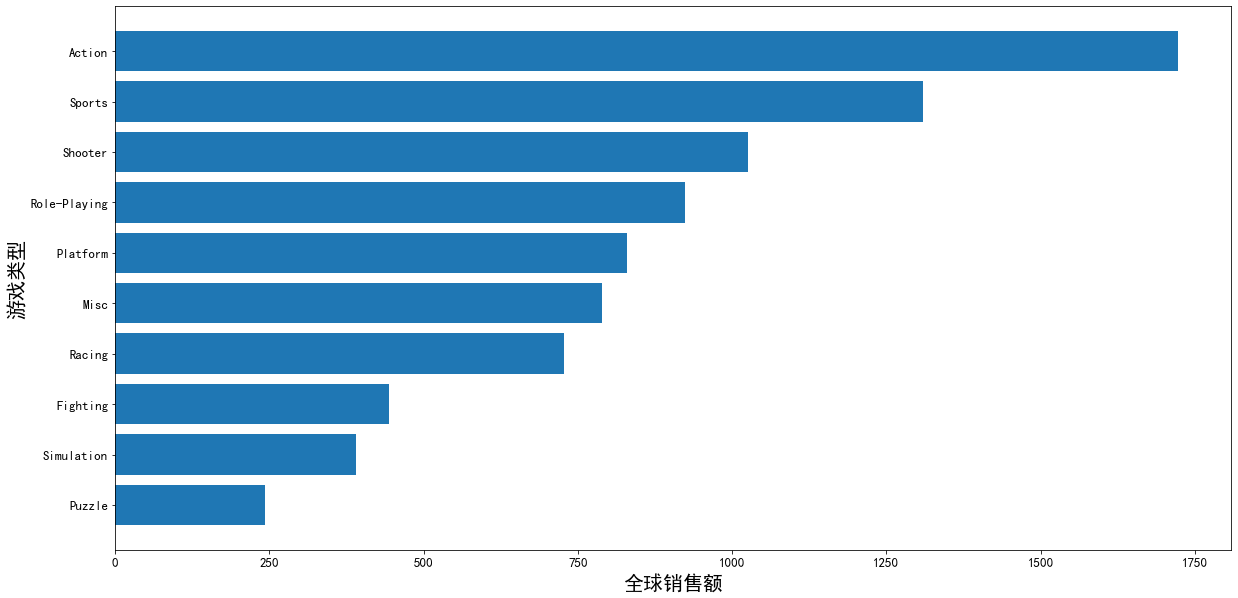

In [11]:
y=topGenre['Global_Sales'].values[::-1]
x=topGenre.index.values[::-1]
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("全球销售额",fontdict={'weight':'normal','size':20})
plt.ylabel("游戏类型",fontdict={'weight':'normal','size':20})
plt.tick_params(labelsize = 13)
plt.barh(x,y)
plt.show()

查看总销量排名前十的发行商，通过总销量查看哪些发行商受欢迎

In [12]:
df5=df1[['Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
topPublisher = df5.groupby('Publisher').sum().sort_values('Global_Sales',ascending = False).head(10)
print(topPublisher)

                              NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Publisher                                                                 
Nintendo                        815.75    418.30    454.99        95.19   
Electronic Arts                 584.22    367.38     13.98       127.63   
Activision                      426.01    213.72      6.54        74.79   
Sony Computer Entertainment     265.22    187.55     74.10        80.40   
Ubisoft                         252.81    163.03      7.33        50.16   
Take-Two Interactive            220.47    117.95      5.83        55.20   
THQ                             208.60     94.60      5.01        32.11   
Konami Digital Entertainment     88.91     68.62     90.93        29.91   
Sega                            108.78     81.41     56.19        24.30   
Namco Bandai Games               69.38     42.61    126.84        14.64   

                              Global_Sales  
Publisher                                   
Nintendo 

从表中可以发现任天堂、EA、动视、索尼、育碧这些游戏发行商比较热门，将这些发行商的销量可视化

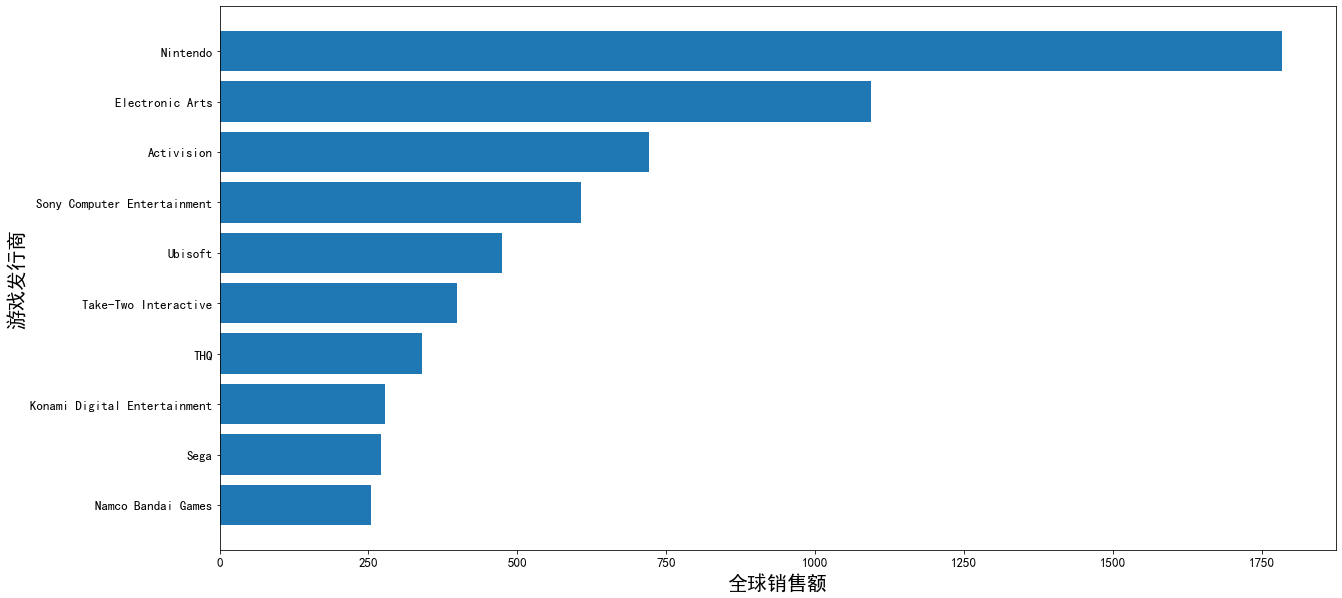

In [13]:
y=topPublisher['Global_Sales'].values[::-1]
x=topPublisher.index.values[::-1]
plt.figure(figsize=(20,10))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("全球销售额",fontdict={'weight':'normal','size':20})
plt.ylabel("游戏发行商",fontdict={'weight':'normal','size':20})
plt.tick_params(labelsize = 13)
plt.barh(x,y)
plt.show()

根据以往的游戏销售额预测未来几年内的游戏销售情况,首先查看游戏销售量的走势图以预估游戏销量大致符合一个什么样的函数

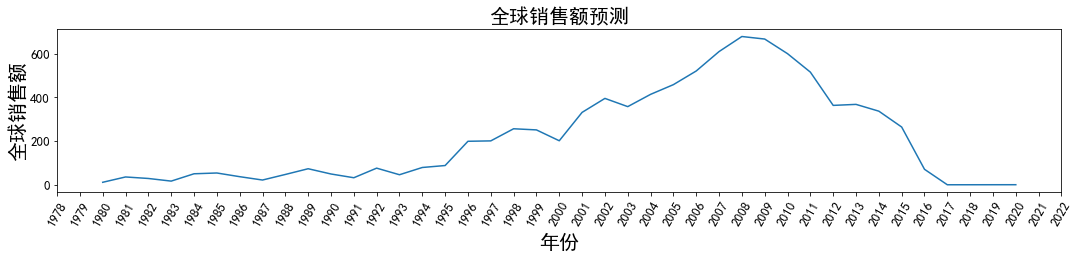

In [16]:
y = df1.groupby('Year').sum()['Global_Sales'].values.reshape([39,1])
x = np.array(list(df1.groupby('Year').groups.keys())).reshape([39,1])
plt.figure(figsize=(18,3))
plt.xlabel("年份",fontdict={'weight':'normal','size': 20})
plt.ylabel("全球销售额",fontdict={'weight':'normal','size': 20})
plt.tick_params(labelsize=13)
ax=plt.gca()
plt.xticks(rotation=60)
x_major_locator=plt.MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.plot(x, y)
plt.title('全球销售额预测',fontdict={'weight':'normal','size': 20})
plt.show()

从表中数据可以看出，销售额的曲线在1980-2008年都在上升，后续则在下降，但我认为游戏市场一定会再度反弹，且2017-2020数据量太少不具有参考价值，因此我认为未来游戏销量可能呈上升趋势，因此我简单使用线性函数进行拟合。

In [26]:
y = df1.groupby('Year').sum()['Global_Sales'].values.reshape([39,1])
x = np.array(list(df1.groupby('Year').groups.keys())).reshape([39,1])
from sklearn import linear_model
# 建立线性模型预测全球销售额
model = linear_model.LinearRegression()
model.fit(x,y)
test = np.array([2021.0,2022.0,2023.0,2024.0,2025.0,2026.0]).reshape([6,1])
pre_y = model.predict(test)

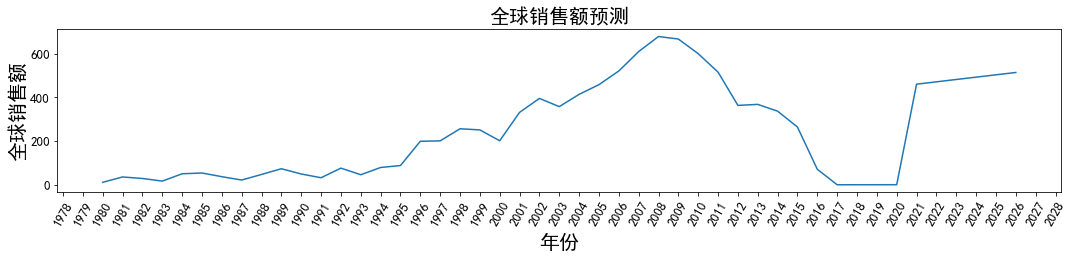

In [27]:
y = np.concatenate((y,pre_y))
x = np.concatenate((x,test))
plt.figure(figsize=(18,3))
plt.xlabel("年份",fontdict={'weight':'normal','size': 20})
plt.ylabel("全球销售额",fontdict={'weight':'normal','size': 20})
plt.tick_params(labelsize=13)
ax=plt.gca()
plt.xticks(rotation=60)
x_major_locator=plt.MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.plot(x, y)
plt.title('全球销售额预测',fontdict={'weight':'normal','size': 20})
plt.show()